# <span style=color:red>  Exploratory Data Analysis - Laptops Pricing dataset </span>

### Objectives
#### After completing this lab you will be able to:

##### Visualize individual feature patterns
##### Run descriptive statistical analysis on the dataset
##### Use groups and pivot tables to find the effect of categorical variables on price
##### Use Pearson Correlation to measure the interdependence between variables
### Setup
#### For this lab, we will be using the following libraries:

##### skillsnetwork for downloading the data
##### pandas for managing the data.
##### numpy for mathematical operations.
##### scipy for statistical operations.
##### seaborn for visualizing the data.
##### matplotlib for additional plotting tools.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [22]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(filepath, header=0)
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


### Task 1 - Visualize individual feature patterns (Corelation PLOTS and box PLOTS)
#### Continuous valued features
#### Step1 = Generate regression plots for each of the parameters "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price". Also, print the value of correlation of each feature with "Price".

(0.0, 3974.15)

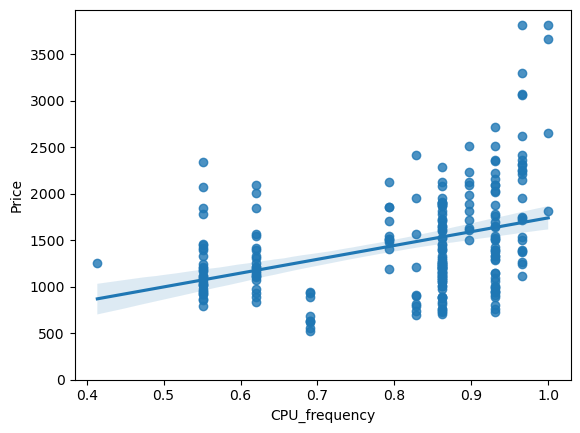

In [25]:
#CPU_frequency on the X-axis and Price on the Y-axis, adding a regression line to show the relationship between these two variables.
sns.regplot(x="CPU_frequency", y="Price", data=df)

plt.ylim(0,) #This sets the limits of the Y-axis in the plot. 
#0 sets the lower limit of the Y-axis, while the upper limit is automatically adjusted based on the data.

(0.0, 3974.15)

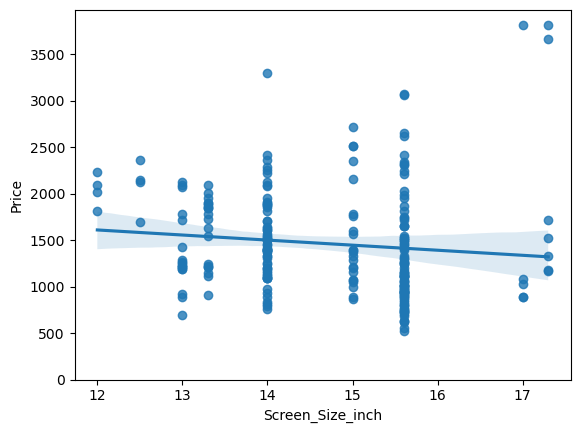

In [29]:
sns.regplot(x="Screen_Size_inch", y="Price", data=df)
plt.ylim(0,)

(0.0, 3974.15)

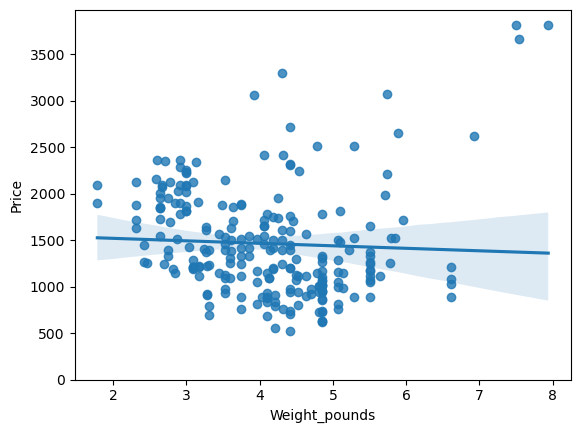

In [31]:
sns.regplot(x="Weight_pounds", y="Price", data=df)
plt.ylim(0,)

In [35]:
# Correlation values of the three attributes with Price
for param in ["CPU_frequency", "Screen_Size_inch","Weight_pounds"]:
    print(f"Correlation of Price and {param} is ", df[[param,"Price"]].corr())

#In summary, this code calculates and prints the correlation between Price and each of the specified columns 
#("CPU_frequency", "Screen_Size_inch", and "Weight_pounds"), helping you understand how these variables relate to Price.

Correlation of Price and CPU_frequency is                 CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
Correlation of Price and Screen_Size_inch is                    Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000
Correlation of Price and Weight_pounds is                 Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


### **This one is BONUS STEP**

In [77]:
# Create a dictionary to store correlation values
correlation_dict = {}

# Calculate and store correlations
for param in ["CPU_frequency", "Screen_Size_inch", "Weight_pounds"]:
    correlation = df[[param, "Price"]].corr().iloc[0, 1]  # Get the correlation value between 'param' and 'Price'
    correlation_dict[param] = correlation

# Find the strongest and weakest correlations
strongest_param = max(correlation_dict, key=correlation_dict.get) #So, as CPU_frequency increases, Price also increases.
weakest_param = min(correlation_dict, key=correlation_dict.get) #It means that as Screen_Size_inch increases, Price might slightly decrease, but the strength of this relationship is very weak.

print(f"The strongest correlation is between Price and {strongest_param} with a value of {correlation_dict[strongest_param]}")
print(f"The weakest correlation is between Price and {weakest_param} with a value of {correlation_dict[weakest_param]}")


The strongest correlation is between Price and CPU_frequency with a value of 0.36666555892588615
The weakest correlation is between Price and Screen_Size_inch with a value of -0.11064420817118262


### Categorical features

#### Step2 = Generate Box plots for the different feature that hold categorical values. These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"

<Axes: xlabel='Category', ylabel='Price'>

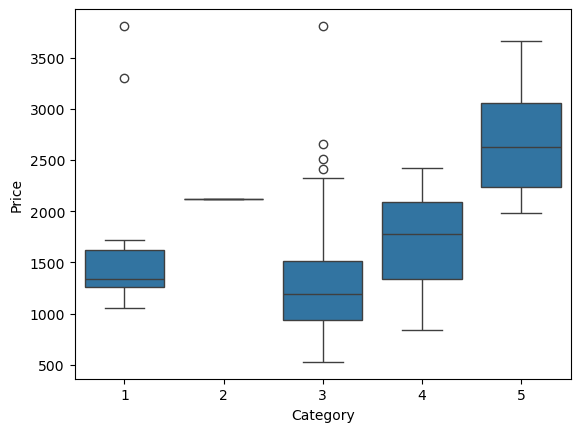

In [39]:
sns.boxplot(x="Category", y="Price", data=df)

<Axes: xlabel='GPU', ylabel='Price'>

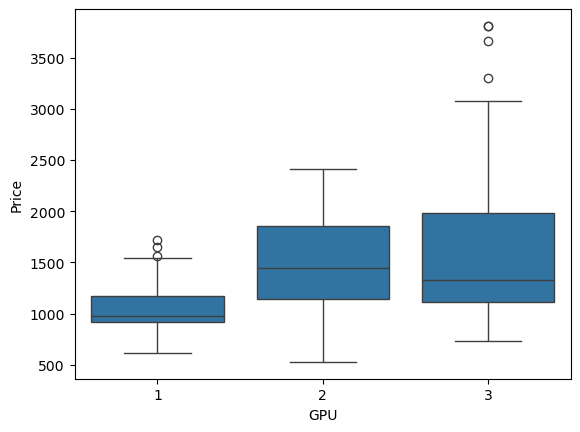

In [41]:
sns.boxplot(x="GPU", y="Price", data=df)

<Axes: xlabel='OS', ylabel='Price'>

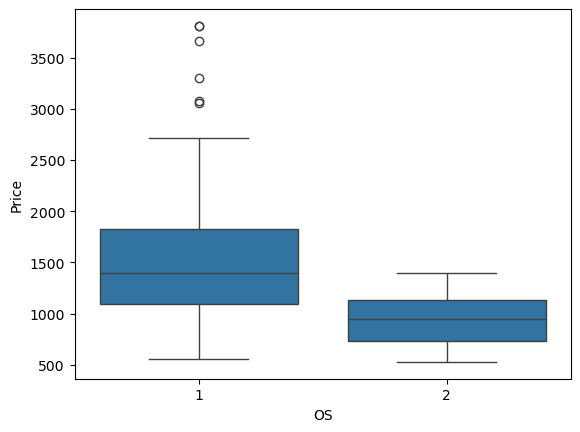

In [43]:
sns.boxplot(x="OS", y="Price", data=df)

<Axes: xlabel='CPU_core', ylabel='Price'>

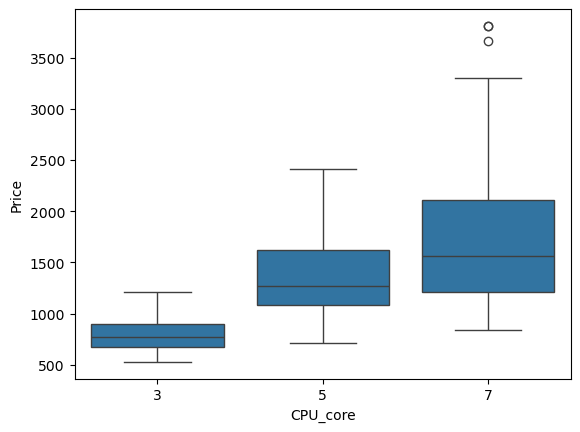

In [45]:
sns.boxplot(x="CPU_core", y="Price", data=df)

<Axes: xlabel='RAM_GB', ylabel='Price'>

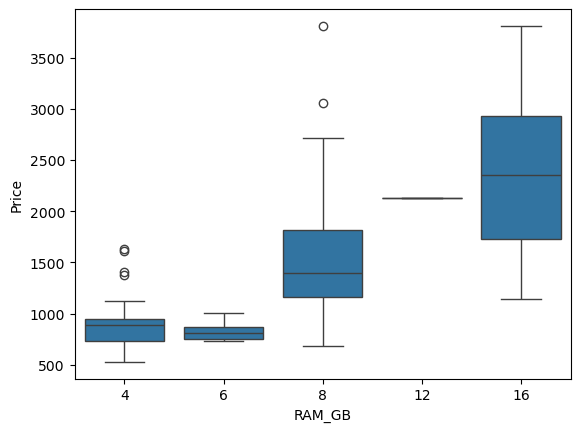

In [47]:
sns.boxplot(x="RAM_GB", y="Price", data=df)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

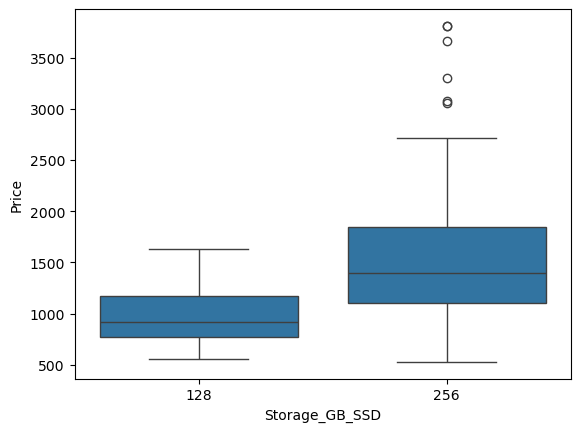

In [49]:
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df)

## Task 2 - Descriptive Statistical Analysis
#### (These methods give you a comprehensive view of both numerical and categorical aspects of your data, which is crucial for initial exploratory data analysis.)









In [58]:
print(df.describe())  # Provides summary statistics for numerical columns in the DataFrame.

print(df.describe(include=['object']))  #Provides summary statistics for categorical (object) columns in the DataFrame.

       Unnamed: 0.1  Unnamed: 0    Category         GPU          OS  \
count    238.000000  238.000000  238.000000  238.000000  238.000000   
mean     118.500000  118.500000    3.205882    2.151261    1.058824   
std       68.848868   68.848868    0.776533    0.638282    0.235790   
min        0.000000    0.000000    1.000000    1.000000    1.000000   
25%       59.250000   59.250000    3.000000    2.000000    1.000000   
50%      118.500000  118.500000    3.000000    2.000000    1.000000   
75%      177.750000  177.750000    4.000000    3.000000    1.000000   
max      237.000000  237.000000    5.000000    3.000000    2.000000   

         CPU_core  Screen_Size_inch  CPU_frequency      RAM_GB  \
count  238.000000        238.000000     238.000000  238.000000   
mean     5.630252         14.688655       0.813822    7.882353   
std      1.241787          1.166045       0.141860    2.482603   
min      3.000000         12.000000       0.413793    4.000000   
25%      5.000000         14.0

## Task 3 - GroupBy and Pivot Tables
### Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize this connection using the pcolor plot.

##### Step1 = This code selects the GPU, CPU_core, and Price columns from the DataFrame df and then groups the data by GPU and CPU_core. It calculates the average Price for each group.

In [61]:
df_gptest = df[['GPU','CPU_core','Price']]
grouped_test1 = df_gptest.groupby(['GPU','CPU_core'],as_index=False).mean()
print(grouped_test1)

   GPU  CPU_core        Price
0    1         3   769.250000
1    1         5   998.500000
2    1         7  1167.941176
3    2         3   785.076923
4    2         5  1462.197674
5    2         7  1744.621622
6    3         3   784.000000
7    3         5  1220.680000
8    3         7  1945.097561


##### Step2 = This code converts the grouped data into a pivot table. It arranges the data with GPU values as rows and CPU_core values as columns, showing average Price values.

In [63]:
grouped_pivot = grouped_test1.pivot(index='GPU',columns='CPU_core')
print(grouped_pivot)

               Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561


##### Step3 = This code visualizes the pivot table as a heatmap using matplotlib.


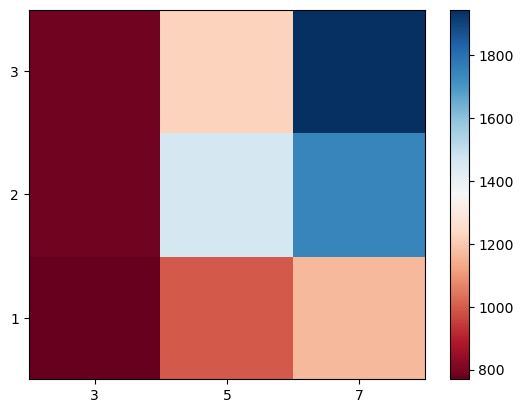

In [65]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)

## Task 4 - Pearson Correlation and p-values
#### Use the scipy.stats.pearsonr() function to evaluate the Pearson Coefficient and the p-values for each parameter tested above. This will help you determine the parameters most likely to have a strong effect on the price of the laptops.

In [74]:
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)

RAM_GB
The Pearson Correlation Coefficient for  RAM_GB  is 0.5492972971857841  with a P-value of P = 3.6815606288429613e-20
CPU_frequency
The Pearson Correlation Coefficient for  CPU_frequency  is 0.36666555892588615  with a P-value of P = 5.502463350713296e-09
Storage_GB_SSD
The Pearson Correlation Coefficient for  Storage_GB_SSD  is 0.24342075521810302  with a P-value of P = 0.00014898923191724223
Screen_Size_inch
The Pearson Correlation Coefficient for  Screen_Size_inch  is -0.11064420817118273  with a P-value of P = 0.08853397846830766
Weight_pounds
The Pearson Correlation Coefficient for  Weight_pounds  is -0.05031225837751551  with a P-value of P = 0.43976938534338944
CPU_core
The Pearson Correlation Coefficient for  CPU_core  is 0.4593977773355115  with a P-value of P = 7.912950127009034e-14
OS
The Pearson Correlation Coefficient for  OS  is -0.22172980114827384  with a P-value of P = 0.0005696642559246749
GPU
The Pearson Correlation Coefficient for  GPU  is 0.28829819888814273 